# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [16]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [17]:
# Your work here.

### Preliminaries

In [18]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from matplotlib import mlab
import seaborn as sns

np.random.seed(42)

In [19]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [21]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


## 1. Is the distribution of body temperatures normal?

### Qualitative and Graphical Methods

#### Histogram Plot

In [22]:
# (x_th_pdf, y_th_pdf) is the pdf for N(temp_mean, temp_std ** 2)

temp = df.temperature # Temperature Sample

temp_mean = np.mean(temp) # Sample Mean
temp_std = np.std(temp) # Sample Standard Deviation

x_init = np.linspace((min(temp) - temp_mean) / temp_std , \
                    (max(temp) - temp_mean) / temp_std , \
                    (len(temp))) # min z-score in sample range to max z-score in sample range
y_init = stats.norm.pdf(x_init) # N(0, 1) over x_init

x_th_pdf = x_init * temp_std + temp_mean # Scale x_init to sample range
y_th_pdf = y_init / temp_std # Normalization

print('The mean of the sample is %.2f and its standard deviation is %.2f.' % (temp_mean, temp_std))

The mean of the sample is 98.25 and its standard deviation is 0.73.


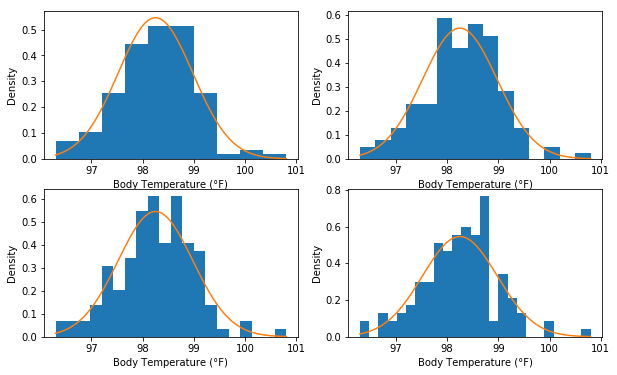

In [23]:
# Plot normed histograms with various bin sizes. Overlay the theoretical pdf N(temp_mean, temp_std **2)
_ = plt.subplots(figsize=(10,6))
for i in range(4):
    _ = plt.subplot(2,2,i+1)
    _ = plt.hist(temp, bins=5*i+10, density=True)
    _ = plt.plot(x_th_pdf, y_th_pdf)
    _ = plt.xlabel('Body Temperature (°F)')
    _ = plt.ylabel('Density')
plt.show()

The distribution of body temperatures could be normal but it seems a bit skew when viewing a histogram.

#### Empirical Cumulative Distribution Function (ECDF)

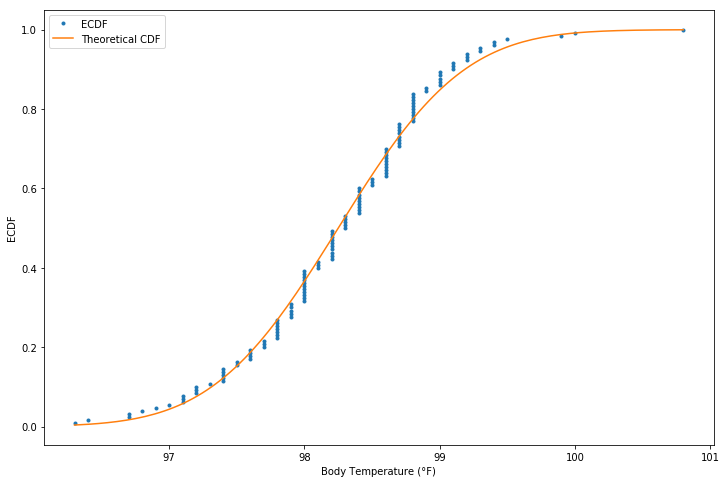

In [24]:
# ECDF function from DataCamp course:

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# Plot the ecdf. Overlay the theoretical cdf N(temp_mean, temp_std **2)

x_temp, y_temp = ecdf(temp)

x_th_cdf = x_init * temp_std + temp_mean
y_th_cdf = stats.norm.cdf(x_init)

_ = plt.figure(figsize=(12,8))
_ = plt.plot(x_temp, y_temp, marker = ".", linestyle = 'none', label='ECDF')
_ = plt.plot(x_th_cdf, y_th_cdf, label='Theoretical CDF')
_ = plt.xlabel('Body Temperature (°F)')
_ = plt.ylabel('ECDF')
_ = plt.legend(loc='upper left')

There is a bit of deviation but the plot looks close to the theoretical curve.

#### Normal Probability Plot

A [normal probability plot](https://en.wikipedia.org/wiki/Normal_probability_plot) is a type of [Q-Q plot](https://en.wikipedia.org/wiki/Q–Q_plot) used to check for substantive departures from normality.

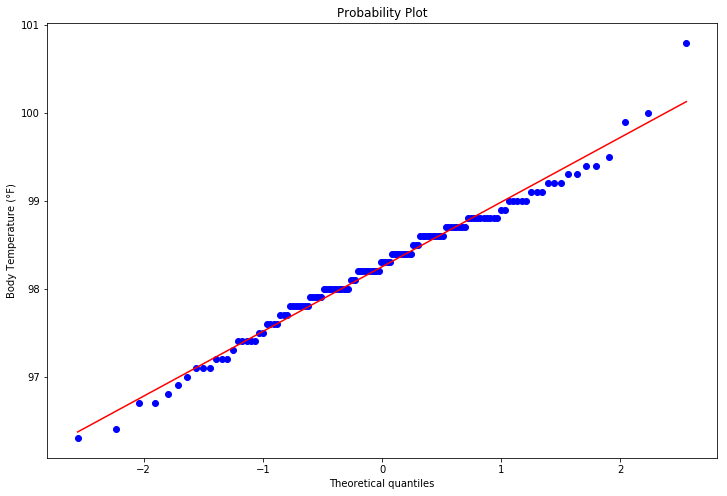

In [25]:
_ = plt.figure(figsize=(12,8))
_ = stats.probplot(temp, plot=plt)

_ = plt.ylabel('Body Temperature (°F)')

Aside from a few deviations near the ends of the straight line segment, the sample exhibits few departures from normality.

### Quantitative and Numerical Methods

We will perform a few quantitative normality tests.
Let

$H_0$ : The distribution of body temperatures is normal

$H_1$ : The distribution of body temperatures is not normal

Level of significance $\alpha = 0.05$

In [26]:
alpha = 0.05

#### Shapiro-Wilk

The [Shapiro-Wilk test of normality](https://en.wikipedia.org/wiki/Shapiro–Wilk_test) computes a test statistic $W$, where $W \in [0,1]$, and small values of $W$ lead to a rejection of normality while values of $W$ near one indicate normality. The [stats.shapiro scipy function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) additionally provides a $p$-value $p = P( x \geq W \ | \ H_0 \text{ is true})$. 

Of the normality tests considered in [1], Shapiro-Wilk is the most powerful normality test at a given level of significance.

[1] [Razali, Nornadiah; Wah, Yap Bee (2011). "Power comparisons of Shapiro–Wilk, Kolmogorov–Smirnov, Lilliefors and Anderson–Darling tests" (PDF). Journal of Statistical Modeling and Analytics. 2 (1): 21–33](https://web.archive.org/web/20150630110326/http://instatmy.org.my/downloads/e-jurnal%202/3.pdf)

In [27]:
(W, p) = stats.shapiro(temp)

print('The statistics are W = %.3f and p = %.3f.' % (W, p))

if p > alpha:
    print('Fail to reject H_0: The sample looks normal.')
else:
    print('Reject H_0: The sample does not look normal.')

The statistics are W = 0.987 and p = 0.233.
Fail to reject H_0: The sample looks normal.


#### Anderson-Darling

The [Anderson-Darling](https://en.wikipedia.org/wiki/Anderson–Darling_test) test of normality is the next most powerful normality test considered in [1]. It is a modification of the [Cramér-von Mises criterion](https://en.wikipedia.org/wiki/Cramér–von_Mises_criterion). The [stats.anderson scipy function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html) provides the Anderson-Darling (AD) test statistic, critical values, and significance levels for the corresponding critical values.



In [28]:
ad = stats.anderson(temp)

print('AD test statistic: %.3f' % ad.statistic)

print('Significance: Critical Value')
for i in range(len(ad.critical_values)):
    sl, cv = ad.significance_level[i], ad.critical_values[i]
    if ad.statistic < ad.critical_values[i]:
        print('%.1f: %.3f; Fail to reject H_0: The sample looks normal.' % (sl, cv))
    else:
        print('%.1f: %.3f; Reject H_0: The sample does not look normal.' % (sl, cv))

AD test statistic: 0.520
Significance: Critical Value
15.0: 0.560; Fail to reject H_0: The sample looks normal.
10.0: 0.637; Fail to reject H_0: The sample looks normal.
5.0: 0.765; Fail to reject H_0: The sample looks normal.
2.5: 0.892; Fail to reject H_0: The sample looks normal.
1.0: 1.061; Fail to reject H_0: The sample looks normal.


#### `stats.normaltest`

Based on D’Agostino and Pearson’s test, scipy provides the [`stats.normaltest` function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html) which returns a test statistic and a p-value. 

In [29]:
stat, p = stats.normaltest(temp)

print('The statistics are stat = %.3f and p = %.3f.' % (stat, p))
if p > alpha:
    print('Fail to reject H_0: The sample looks normal.')
else:
    print('Reject H_0: The sample does not look normal.')

The statistics are stat = 2.704 and p = 0.259.
Fail to reject H_0: The sample looks normal.


The preceding discussion suggests that we should **fail to reject $H_0$**, that is, proceed with the hypothesis that the distribution of body temperatures is normal.

## 2. Is the sample size large? Are the observations independent?



Since the sample size $n = 130$ is much less than 10% of the population of humans, this sample satisfies the "10% Rule" for independence. We will have to assume that there is no particular factor in the sample which should lead us to believe that the sample does not follow the population distribution of body temperatures.

Our sample size $n$ is sufficiently large to use the CLT, as $n \geq 30$, the sample is unimodal, and $n$ meets the 10% Rule.

In [30]:
n = len(temp)
n

130

## 3. Is the true population mean really 98.6 degrees F?

Let's state our hypotheses. Since Wunderlich's measurement prevailed for over 120 years, we will take his measurement of the population mean to be the value in our null hypothesis. For $\mu$, the population mean,

* $H_0$ : $\mu = 98.6 \ {}^\circ{} F$
* $H_1$ : $\mu \neq 98.6 \ {}^\circ{} F$.

We proceed with level of significance $\alpha = 0.05$.

In [31]:
mu0 = 98.6 # °F

### Bootstrap Hypothesis Test

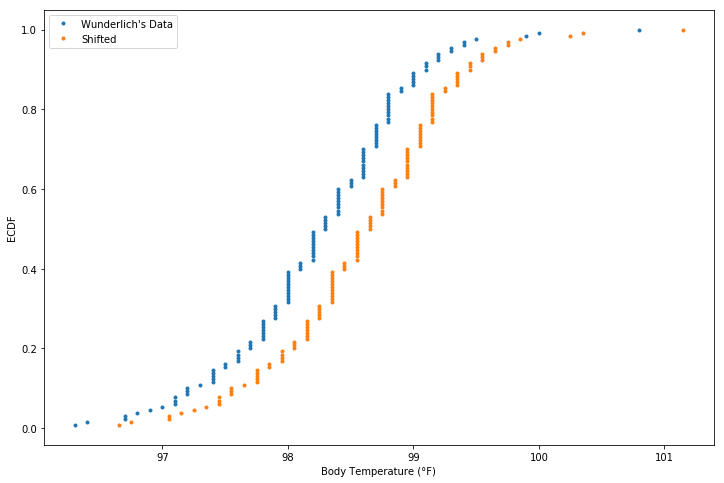

In [32]:
temp_shifted = temp - temp_mean + mu0 # Shift Wunderlich's data to have mean mu0

x_temp_shifted, y_temp_shifted = ecdf(temp_shifted)

# Plot ECDFs of original and shifted data
_ = plt.figure(figsize=(12,8))
_ = plt.plot(x_temp, y_temp, marker = ".", linestyle = 'none')
_ = plt.plot(x_temp_shifted, y_temp_shifted, marker = ".", linestyle = 'none')
_ = plt.xlabel('Body Temperature (°F)')
_ = plt.ylabel('ECDF')
_ = plt.legend(['Wunderlich\'s Data', 'Shifted'])

Let's use bootstrapping to simulate data acquisition under $H_0$.

In [33]:
# draw_bs_reps function from DataCamp course:

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

def diff_from_mu0(data, value=mu0):
    return np.mean(data) - value

diff_observed = diff_from_mu0(temp)

print('The observed difference between the sample mean and the population mean of H_0 is %.2f °F' % diff_observed)

bs_replicates = draw_bs_reps(temp_shifted, diff_from_mu0, 10000)

p_value = np.sum(bs_replicates <= diff_observed) / len(bs_replicates)

print('The p-value is %.4f' % p_value)

if p_value > alpha:
    print('Fail to reject H_0.')
else:
    print('Reject H_0.')

The observed difference between the sample mean and the population mean of H_0 is -0.35 °F
The p-value is 0.0000
Reject H_0.


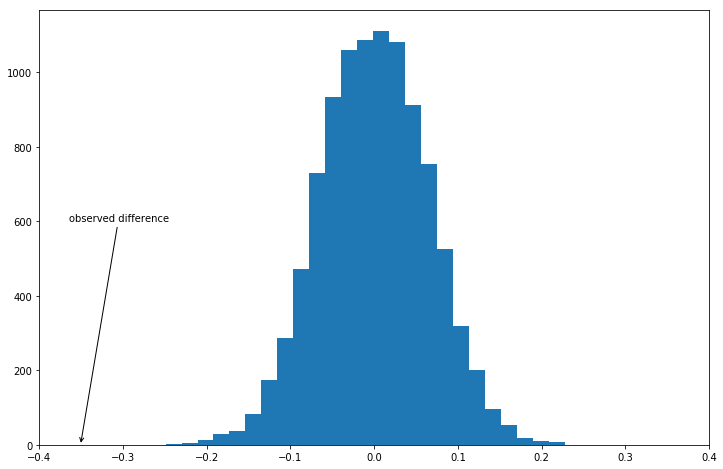

In [34]:
_ = plt.figure(figsize=(12,8))
_ = plt.hist(bs_replicates, bins=25)
_ = plt.annotate('observed difference', xy=(diff_observed, 0), xytext=(-0.365, 600), arrowprops=dict(arrowstyle='->'))
_ = plt.xlim(-0.4, 0.4)

None of the 10,000 bootstrap replicates have an observed difference of magnitude at least 0.35. Given our assumptions about the sample, we should reject $H_0$, that is, we should reject $\mu = 98.6 \ {}^\circ{} F$. We adopt $H_1$, that the population mean is not 98.6 °F.

### Frequentist Hypothesis Test

Here we will assume the same $H_0$ and $H_1$ as we did in the Bootstrap Hypothesis Test. Since the data is a single sample, and we are comparing his sample to a single statistic, we use a (two-sided) one-sample test.

Since the sample meets the hypothesis for the CLT, we consider the sampling distribution of the sample mean to be approximately normal. Therefore we can use a $z$-test with the assumption that $\sigma$ can be approximated by $s_\bar{x}$. We compute the standard error of the mean, $\sigma_{\bar{x}}$ via 
$$\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}} \approx \frac{s_\bar{x}}{\sqrt{n}},$$
and we compute a $z$-statistic via
$$z_0 = \frac{\bar{x} - \mu}{\sigma_{\bar{x}}}.$$
We then compute the (two-tailed) $p$-value via
$$\begin{align}
p &= P(z < -|z_0| \text{ or } z > |z_0|) \\
&= 1 - P(-|z_0| < z < |z_0|) \\
&= 2 * (1 -  P(z < |z_0|)),
\end{align}$$
where the last equality follows from the symmetry of the normal distribution.

In [35]:
z_statistic = (temp_mean - mu0) / (temp_std / math.sqrt(n))
p_value = 2 * (stats.norm.sf(abs(z_statistic))) # Two-tail; SF = 1 - CDF
print('The z-statistic is %.2f and the p-value is %.9f' % (z_statistic, p_value))

if p_value > alpha:
    print('Fail to reject H_0.')
else:
    print('Reject H_0.')

The z-statistic is -5.48 and the p-value is 0.000000044
Reject H_0.


The result is that the $z$-statistic suggests the difference between $\mu$ and $\bar{x}$ is sufficient to reject $H_0$. We adopt the alternative hypothesis, that is, the mean human body temperature is not 98.6 °F.

#### What if we try to compute a $t$-statistic anyway?

Despite the fact that we do not, a priori, know the population standard deviation $\sigma$, our sample is sufficiently large ($n \geq 30$) with a sufficiently normal distribution to meet the hypothesis of the CLT. So while a $z$-test is appropriate, we can use a $t$-test as well; given modern software, this is as straight-forward as applying the $z$-test. As the $t$-distribution converges to the normal distribution for large $n$, we should expect the same result using a $t$-test. We compute the $t$-statistic
$$t_0 = \frac{\bar{x} - \mu}{\left(s_x / \sqrt{n}\right)},$$
where $s_x$ is the sample standard deviation.

We then compute the (two-tailed) $p$-value via
$$\begin{align}
p &= P(t < -|t_0| \text{ or } t > |t_0|) \\
&= 1 - P(-|t_0| < t < |t_0|) \\
&= 2 * (1 -  P(t < |t_0|)),
\end{align}$$
where the last equality follows from the symmetry of the $t$-distribution.

In [59]:
t_statistic = (temp_mean - mu0) / (temp_std / math.sqrt(n))
p_value = 2 * (stats.t.sf(abs(t_statistic), n-1)) # Two-tail, SF = 1 - CDF
print('The t-statistic is %.2f and the p-value is %.9f' % (t_statistic, p_value))

if p_value > alpha:
    print('Fail to reject H_0.')
else:
    print('Reject H_0.')

The t-statistic is -5.48 and the p-value is 0.000000219
Reject H_0.


## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [77]:
small_sample = np.random.choice(temp, 10)

small_sample_mean = np.mean(small_sample)
small_sample_std = np.std(small_sample)

### One-Sample to Compare Mean of `small_sample` to $\mu$

With a subsample of size 10, we no longer have grounds to believe that the hypothesis of the CLT is met. If we are ignorant of the data of the original sample (with $n = 130$), then we cannot presume the population distribution is normal. Therefore we should use a $t$-test.

In [78]:
def t_statistics_sample(data, pop_mean=mu0):
    """Compute the t-statistic and p-value for data."""
    t_stat = (np.mean(data) - mu0) / (np.std(data) / math.sqrt(len(data)))
    p_val = 2 * (1 - stats.t.cdf(abs(t_stat), len(data)-1))
    return t_stat, p_val

t_statistic_small, p_value_small = t_statistics_sample(small_sample)
print('The t-statistic is %.2f and the p-value is %.7f' % (t_statistic_small, p_value_small))

if p_value_small > alpha:
    print('Fail to reject H_0.')
else:
    print('Reject H_0.')

The t-statistic is -2.09 and the p-value is 0.0664837
Fail to reject H_0.


This small sample gives us insufficient evidence to reject $H_0$. The $p$-value is much greater with this size 10 subsample. Additionally, we can investigate the likelihood of choosing a size 10 subsample with a sufficient $t$-statistic to reject $H_0$ using bootstrap samples.

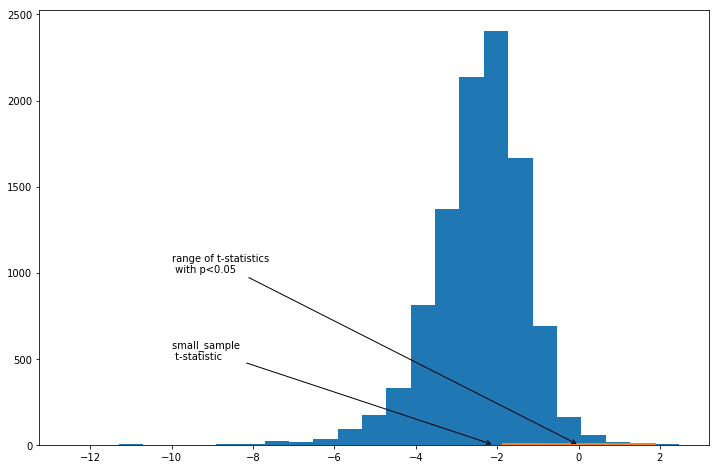

In [81]:
bs_replicates = draw_bs_reps(np.random.choice(temp, 10), lambda x: t_statistics_sample(x)[0], 10000)
_ = plt.figure(figsize=(12,8))
_ = plt.hist(bs_replicates, bins=25)
_ = plt.annotate('small_sample \n t-statistic', xy=(t_statistic_small, 0), xytext=(-10, 500), arrowprops=dict(arrowstyle='->'))
_ = plt.plot(stats.t.ppf([alpha, 1-alpha], 9), [0,0], linewidth=5.0)
_ = plt.annotate('range of t-statistics \n with p<0.05', xy=(0, 0), xytext=(-10, 1000), arrowprops=dict(arrowstyle='->'))

In [82]:
bs_replicates_p = 2 * (stats.t.sf(abs(bs_replicates), 10-1))
prop = np.sum(bs_replicates_p <= alpha) / len(bs_replicates_p)
print('The proportion of bootstrap samples of size 10 subsamples with t-statistic \
sufficient to reject H_0 is {:.2%}.'.format(prop))

The proportion of bootstrap samples of size 10 subsamples with t-statistic sufficient to reject H_0 is 53.35%.


In other words, roughly 47% of the bootstrap samples in the space of size 10 subsamples we chose would have led us to fail to reject $H_0$. Although we should avoid considering this an estimate of the probability of choosing a size 10 subsample for which we would fail to reject $H_0$, as we do not discuss how bootstrapping estimates this distribution, we do find a non-negligible number of bootstrap samples which would have led us to reject $H_0$, showing that it is at least plausible that we could have selected such a size 10 subsample.

### What about the z-statistic?

A $z$-test is not appropriate given our sample size is small (≤ 30) (also we do not know the population standard deviation $\sigma$). To use a $z$-test we must proceed with the (unjustified for `small_sample`) assumption that the population human body temperatures are normally distributed and we will again use the sample standard deviation to approximate the population standard deviation.

In [83]:
def z_statistics_sample(data, pop_mean=mu0):
    """Compute the t-statistic and p-value for data."""
    z_stat = (np.mean(data) - mu0) / (np.std(data) / math.sqrt(len(data)))
    p_val = 2 * (stats.norm.sf(abs(z_stat)))
    return z_stat, p_val

z_statistic_small, p_value_small = z_statistics_sample(small_sample)
print('The z-statistic is %.2f and the p-value is %.7f' % (z_statistic_small, p_value_small))

if p_value_small > alpha:
    print('Fail to reject H_0.')
else:
    print('Reject H_0.')

The z-statistic is -2.09 and the p-value is 0.0368694
Reject H_0.


The z-statistic leads us to reject $H_0$. Note that the $p$-values of the $t$-test and the $z$-test differ by a considerable factor.

Let's again investigate the likelihood of choosing a size 10 subsample with a sufficient $z$-statistic to reject $H_0$ using bootstrap samples.

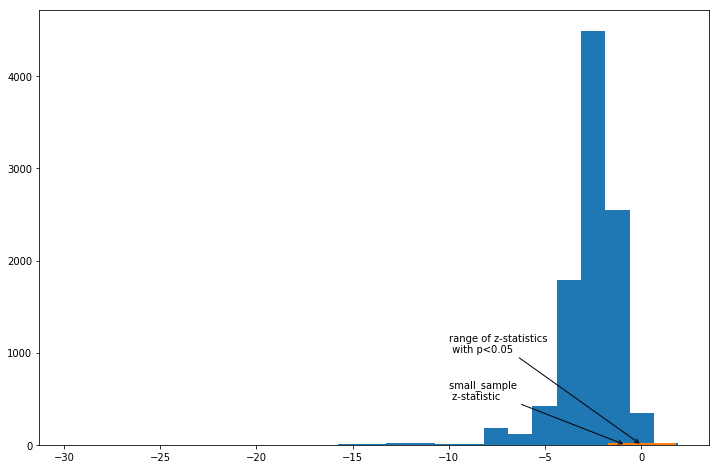

In [65]:
bs_replicates = draw_bs_reps(np.random.choice(temp, 10), lambda x: z_statistics_sample(x)[0], 10000)
_ = plt.figure(figsize=(12,8))
_ = plt.hist(bs_replicates, bins=25)
_ = plt.annotate('small_sample \n z-statistic', xy=(z_statistic_small, 0), xytext=(-10, 500), arrowprops=dict(arrowstyle='->'))
_ = plt.plot(stats.norm.ppf([alpha, 1-alpha]), [0,0], linewidth=5.0)
_ = plt.annotate('range of z-statistics \n with p<0.05', xy=(0, 0), xytext=(-10, 1000), arrowprops=dict(arrowstyle='->'))

In [66]:
bs_replicates_p = 2 * (1 - stats.norm.cdf(abs(bs_replicates)))
prop = np.sum(bs_replicates_p <= alpha) / len(bs_replicates_p)
print('The proportion of bootstrap samples of size 10 subsamples with z-statistic \
sufficient to reject H_0 is {:.2%}.'.format(prop))

The proportion of bootstrap samples of size 10 subsamples with z-statistic sufficient to reject H_0 is 67.22%.


Were we to use the $z$-statistic, there are many subsamples which would give a $z$-statistic sufficient to reject $H_0$ and a considerable number which give insufficient evidence to reject $H_0$.

## 5. At what temperature should we consider someone's temperature to be "abnormal"?

### Bootstrap Approach

Here we compute 95% and 99% confidence intervals for $\bar{x}$ using the bootstrap approach. These will estimate the corresponding confidence intervals for the population mean. We could consider anything beyond the 99% confidence interval abnormal.

In [86]:
bs_replicates = draw_bs_reps(temp, np.mean, 10000)
conf95 = np.percentile(bs_replicates, [2.5, 97.5])
conf99 = np.percentile(bs_replicates, [0.5, 99.5])

print('The 95%% confidence interval is %.3f – %.3f' % tuple(conf95))
print('The 99%% confidence interval is %.3f – %.3f' % tuple(conf99))


The 95% confidence interval is 98.122 – 98.374
The 99% confidence interval is 98.084 – 98.415


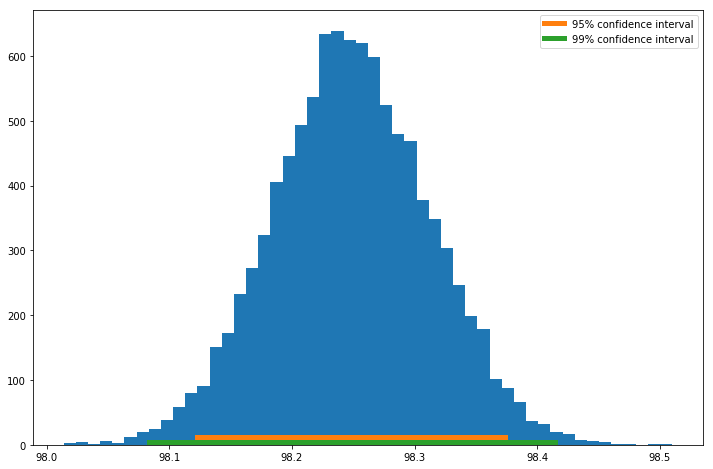

In [89]:
_ = plt.figure(figsize=(12,8))
_ = plt.hist(bs_replicates, bins=50)
_ = plt.plot(conf95, [12,12], linewidth=5.0, label='95% confidence interval')
_ = plt.plot(conf99, [5,5], linewidth=5.0, label='99% confidence interval')
_ = plt.legend()

Note that $\mu = 98.6 {}^\circ F$ is considered abnormal.

### Frequentist Approach

In [46]:
moe95 = stats.t.ppf(.95, n-1) # Margin of error for 95% CI
moe99 = stats.t.ppf(.99, n-1) # Margin of error for 99% CI

sem = temp_std / math.sqrt(n) # Std Error of the Mean (in sampling distr?)

print('The 95%% confidence interval is %.3f – %.3f' % (temp_mean - moe95 * sem, temp_mean + moe95 * sem))
print('The 99%% confidence interval is %.3f – %.3f' % (temp_mean - moe99 * sem, temp_mean + moe99 * sem))

The 95% confidence interval is 98.143 – 98.355
The 99% confidence interval is 98.098 – 98.400


These confidence intervals are quite close to those we obtained using the Bootstrap Approach

## 6. Is there a significant difference between males and females in normal temperature?

In [47]:
male = df[df['gender'] == 'M']['temperature']
female = df[df['gender'] == 'F']['temperature']

male_mean = np.mean(male)
female_mean = np.mean(female)

male_std = np.std(male)
female_std = np.std(female)

print('The mean male temperature is %.3f °F and the mean female temperature is %.3f °F, a difference of %.3f °F.' % \
      (male_mean, female_mean, female_mean - male_mean))

The mean male temperature is 98.105 °F and the mean female temperature is 98.394 °F, a difference of 0.289 °F.


Call $s_{\bar{x}_m}$ be the sample mean male temperature and $s_{\bar{x}_f}$ the sample mean female temperature.

### Qualitative and Graphical

Let's first give a boxplot and a swarmplot of the male and female distributions.

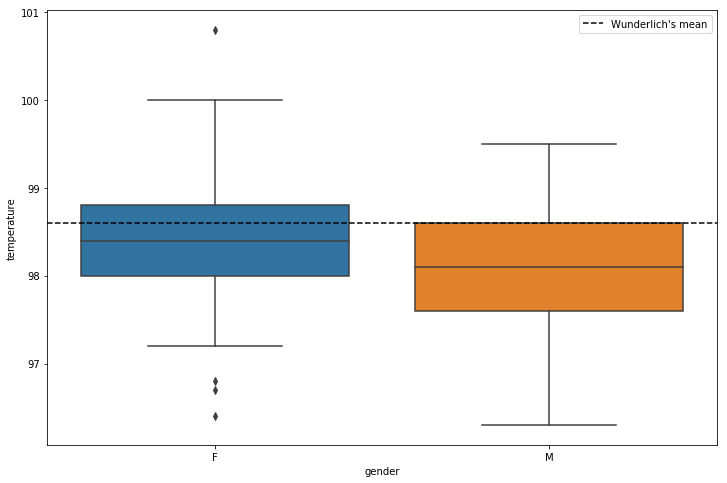

In [48]:
_ = plt.figure(figsize=(12,8))
_ = sns.boxplot(x='gender', y='temperature', data=df)
_ = plt.axhline(y=98.6, label='Wunderlich\'s mean', color='k', linestyle='--')
_ = plt.legend()

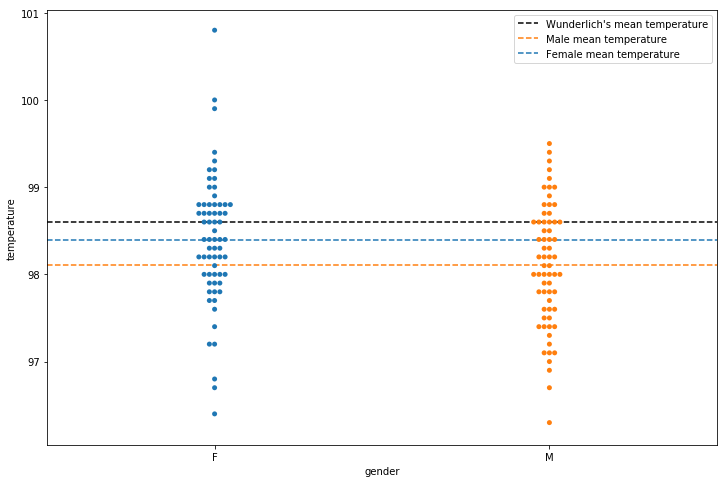

In [49]:
_ = plt.figure(figsize=(12,8))
_ = sns.swarmplot(x='gender', y='temperature', data=df)
_ = plt.axhline(y=98.6, label='Wunderlich\'s mean temperature', color='k', linestyle='--')
_ = plt.axhline(y=male_mean, label='Male mean temperature', color='tab:orange', linestyle='--')
_ = plt.axhline(y=female_mean, label='Female mean temperature', color='tab:blue', linestyle='--')
_ = plt.legend()

### Hypothesis Tests

We would like to know test whether or not the male population mean temperature, $\mu_m$, and the female population mean temperature, $\mu_f$, are equal. So we will consider the following hypotheses:

* $H_0$: $\mu_f = \mu_m \Leftrightarrow \mu_f - \mu_m = \mu_{f-m} = 0$
* $H_1$: $\mu_f \neq \mu_m \Leftrightarrow \mu_f - \mu_m = \mu_{f-m} \neq 0$

We proceed with level of significance $\alpha = 0.05$.

#### Bootstrap Hypothesis Test

We shift both samples to have the same mean, then draw bootstrap samples from the shifted arrays, computing their difference of means, in order to see how likely a difference of $\bar{x}_f - \bar{x}_m = 0.289 {}^\circ F$, where $\bar{x}_f$ is the mean of `female` and $\bar{x}_m$ is the mean of `male`.

In [50]:
female_shift = female - np.mean(female) + temp_mean
male_shift = male - np.mean(male) + temp_mean

bs_replicates_f = draw_bs_reps(female_shift, np.mean, 10000)
bs_replicates_m = draw_bs_reps(male_shift, np.mean, 10000)

bs_replicates = bs_replicates_f - bs_replicates_m

p_value = np.sum(bs_replicates >= (female_mean - male_mean)) / len(bs_replicates)

print('The p-value is %.4f' % p_value)

if p_value > alpha:
    print('Fail to reject H_0.')
else:
    print('Reject H_0.')

The p-value is 0.0118
Reject H_0.


#### Frequentist Hypothesis Test

Now we will perform a two-sample $t$-test for the difference of means. This is the appropriate test because we do not know the underlying population standard deviations. Under the null hypothesis, the two-sample $t$-statistic is
$$t = \frac{(\bar{x}_f - \bar{x}_m) - (\mu_f - \mu_m)}{\sqrt{\frac{s^2_{\bar{x}_f}}{n_f} + \frac{s^2_{\bar{x}_m}}{n_m}}}$$
where $n_f$ and $n_m$ are the sizes and $s_f$ and $s_m$ are the standard deviations of the female and male samples, respectively.

In [51]:
moe = stats.t.ppf(1-alpha, min(len(female), len(male)))

sigma_diff = math.sqrt((female_std ** 2) / len(female) + (male_std ** 2) / len(male))

p_value = stats.t.sf((female_mean - male_mean) / (sigma_diff), min(len(female), len(male)))

print('The p-value is %.4f' % p_value)

if p_value > alpha:
    print('Fail to reject H_0.')
else:
    print('Reject H_0.')

The p-value is 0.0122
Reject H_0.


Both the bootstrap and the frequentist tests give similar $p$-values. It is unlikely that the difference in sample mean male and female temperatures is due to our sample. We accept the alternative hypothesis, that the population mean male and female body temperatures are not equal.